## Live loss plotting during training

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git['live'] # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "retail_sales.csv")

In [3]:
m = NeuralProphet()
df_train, df_val = m.split_df(df, valid_p=0.1)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS


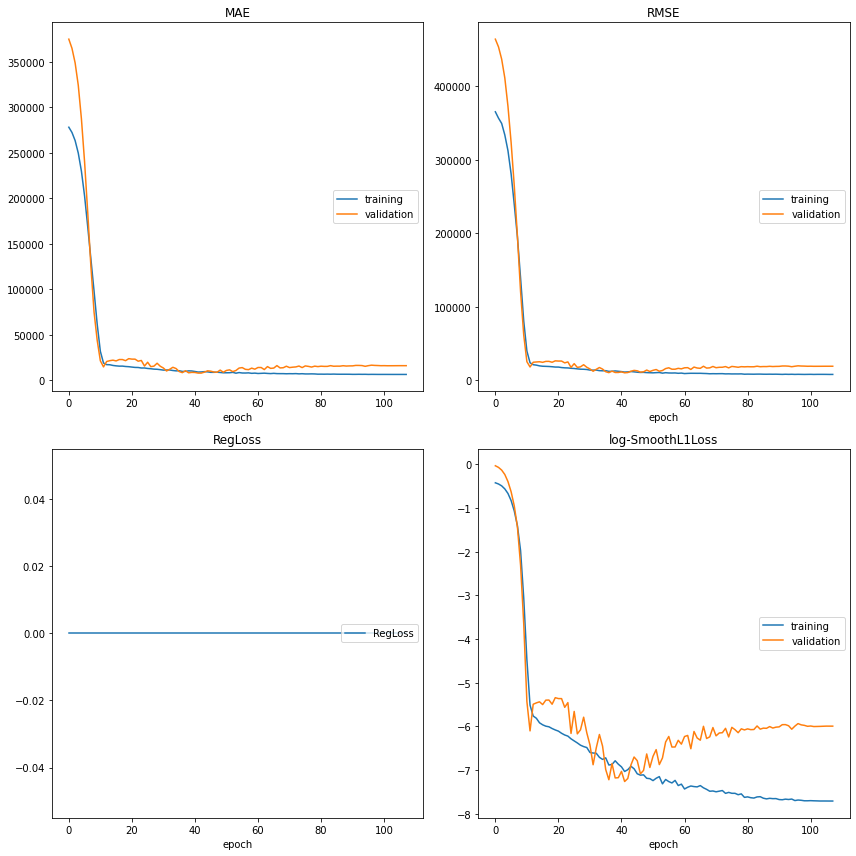

Epoch[108/108]: 100%|█| 108/108 [00:11<00:00,  9.74it/s, SmoothL1Loss=0.00045, 


In [4]:
metrics = m.fit(df_train, validation_df=df_val, plot_live_loss=True)

In [5]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.655224,278135.312320,365355.203512,0.0,0.967910,374934.531351,464213.125357
1,0.637780,272365.079867,356711.836652,0.0,0.932391,364891.623307,453664.735557
2,0.611106,263450.969579,349514.037131,0.0,0.876372,348849.401909,436985.506183
3,0.569817,249674.168350,333817.245862,0.0,0.792382,324193.496490,411393.019341
4,0.513283,229736.147410,312428.895649,0.0,0.673602,287201.435049,372729.469825
...,...,...,...,...,...,...,...
103,0.000450,6367.221354,7993.541934,0.0,0.002486,15948.913542,18992.164457
104,0.000451,6369.987594,7991.618180,0.0,0.002493,15978.846796,19021.301370
105,0.000450,6369.122593,7957.647672,0.0,0.002500,16003.280818,19046.543345
106,0.000450,6367.883777,7885.827196,0.0,0.002499,15998.671826,19042.510980


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


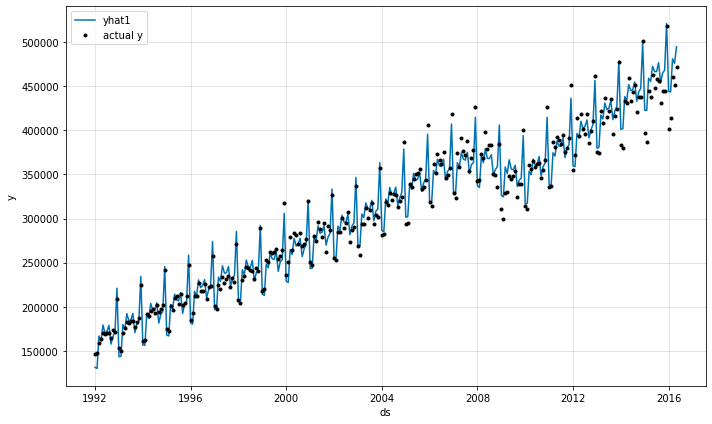

In [6]:
forecast = m.predict(df)
fig = m.plot(forecast)